# Item 6 - Base de dados 20 News_Groups

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import seaborn as sns

In [6]:
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
# Select just a few of these categories, and download the training and testing set.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()

# Classifier for multiclass.
classifier = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='multinomial')
#mnb = MultinomialNB()

# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, classifier)

model.fit(train.data, train.target)
labels = model.predict(test.data)

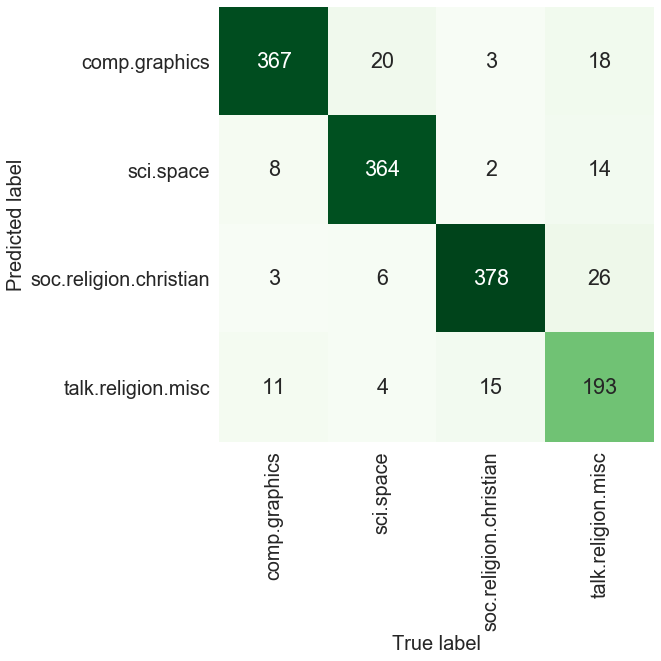

0.909217877094972

In [13]:
# confusion matrix
fig = plt.figure(figsize=(8,8))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Greens")
plt.xlabel('True label', fontsize=20)
plt.ylabel('Predicted label', fontsize=20)
# Save figure
plt.savefig("Confusion_Matrix_Text_Classification_Softmax.png", dpi=600)
plt.show()
accuracy_score(test.target, labels)

In [14]:
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       389
           1       0.94      0.92      0.93       394
           2       0.92      0.95      0.93       398
           3       0.87      0.77      0.81       251

    accuracy                           0.91      1432
   macro avg       0.90      0.90      0.90      1432
weighted avg       0.91      0.91      0.91      1432



In [15]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(test.target, labels)

0.9330366553248373